In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as sp
from scipy import sparse, io
import glob 
import re

/home/sennis/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data was downloaded from GEO under the accession number GSE130756. I just downloaded the 3 normal bone marrow samples to begin with (N01, N02, N03). Data is in the form of a dge matrix with raw counts and no annotations available. Going to assume the cells haven't been QC-ed.

In [5]:
adatas = []
adata = sc.read('../data/wu/GSM4135770_N01_dge.txt.gz').T
adata

AnnData object with n_obs × n_vars = 10000 × 17396

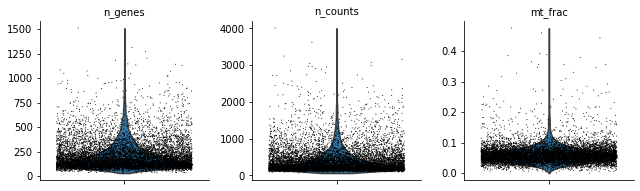

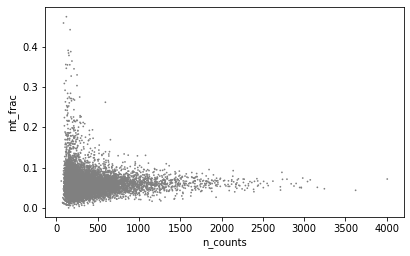

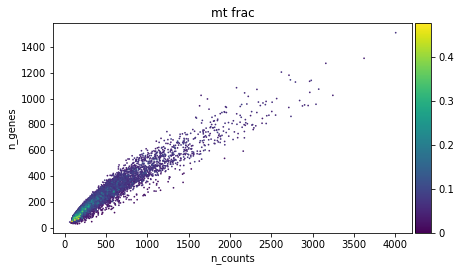

In [7]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

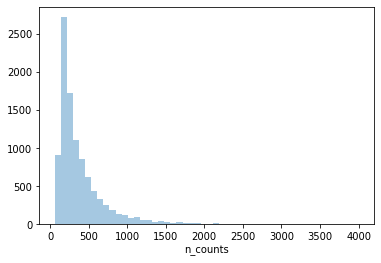

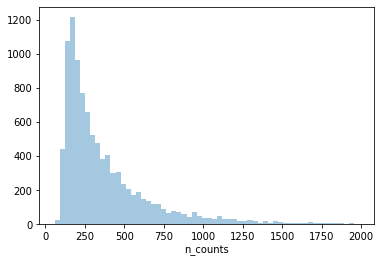

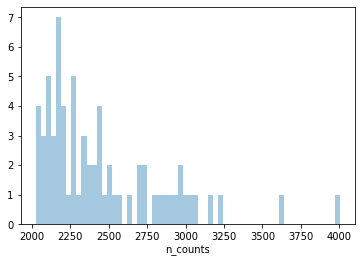

In [8]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<2000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>2000], kde=False, bins=60)
plt.show()

In [9]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 3500)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.4]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 10000
Number of cells after max count filter: 9998
Number of cells after MT filter: 9995


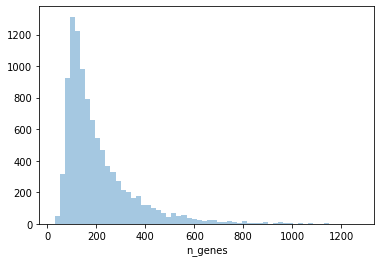

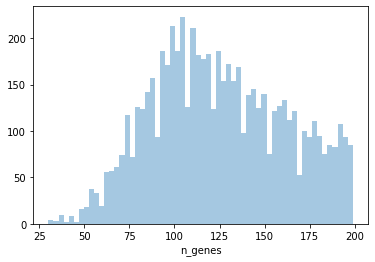

In [11]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 200], kde=False, bins=60)
plt.show()

In [12]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 50)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 9995


Trying to set attribute `.obs` of view, copying.


Number of cells after min genes filter: 9951


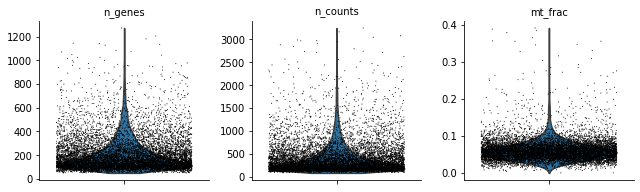

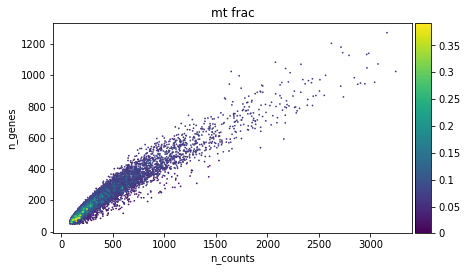

In [13]:
# visualise QC metrics after filtering
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [14]:
adata.obs['sample'] = 'N01'
adata.var_names_make_unique()
adatas.append(adata)

In [15]:
adata = sc.read('../data/wu/GSM4135771_N02_dge.txt.gz').T
adata

AnnData object with n_obs × n_vars = 10000 × 17100

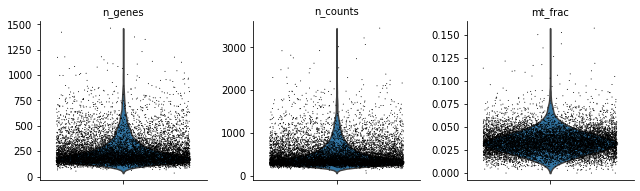

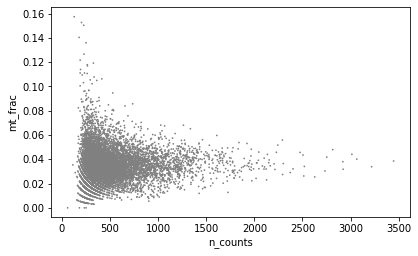

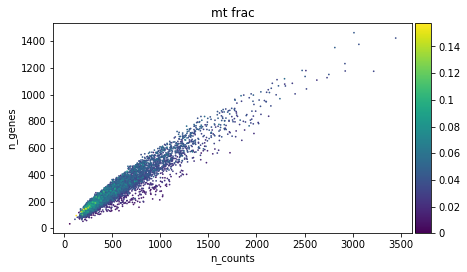

In [16]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

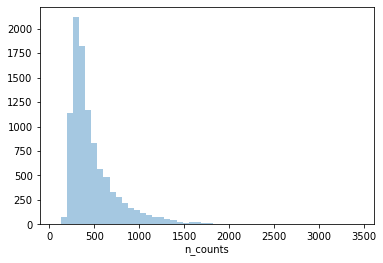

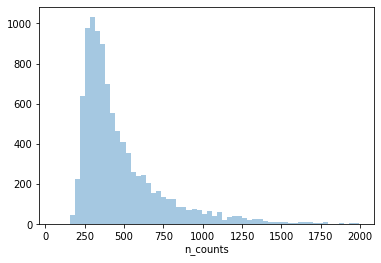

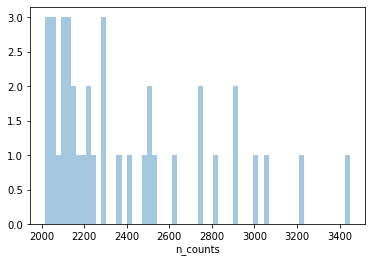

In [17]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<2000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>2000], kde=False, bins=60)
plt.show()

In [18]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 3000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.12]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 10000
Number of cells after max count filter: 9996
Number of cells after MT filter: 9989


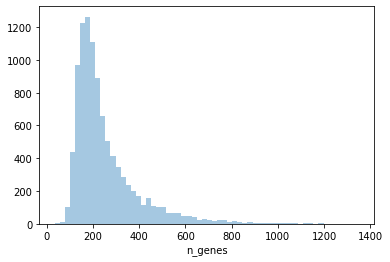

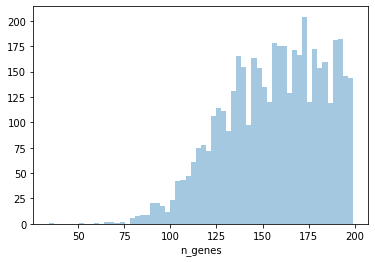

In [19]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 200], kde=False, bins=60)
plt.show()

In [20]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 50)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 9989


Trying to set attribute `.obs` of view, copying.


Number of cells after min genes filter: 9988


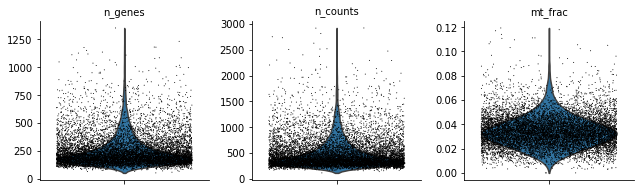

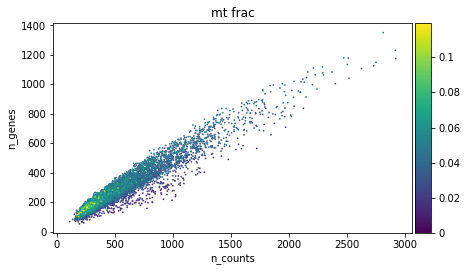

In [21]:
# visualise QC metrics after filtering
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [22]:
adata.obs['sample'] = 'N02'
adata.var_names_make_unique()
adatas.append(adata)

In [23]:
adata = sc.read('../data/wu/GSM4135772_N03_dge.txt.gz').T
adata

AnnData object with n_obs × n_vars = 10000 × 17109

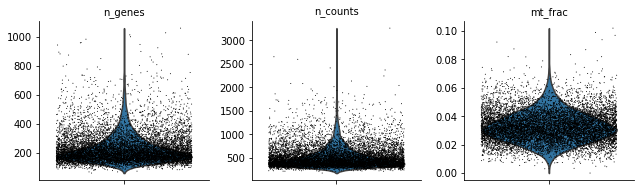

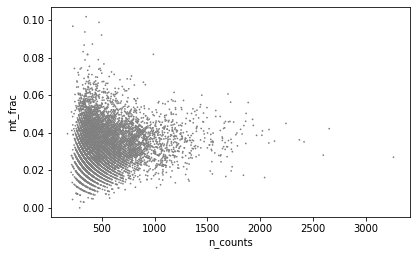

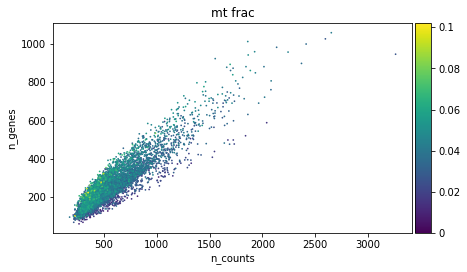

In [24]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

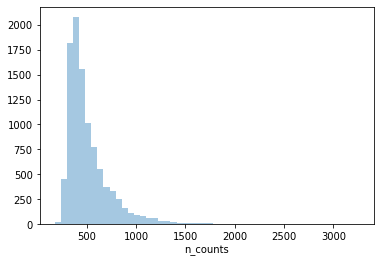

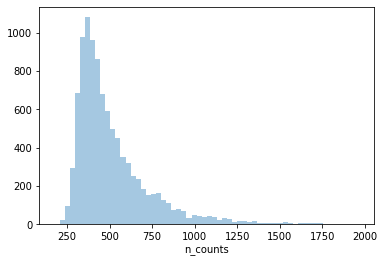

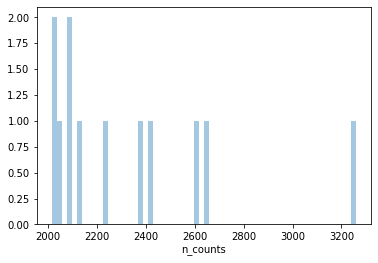

In [25]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<2000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>2000], kde=False, bins=60)
plt.show()

In [26]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 2500)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.08]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 10000
Number of cells after max count filter: 9997
Number of cells after MT filter: 9986


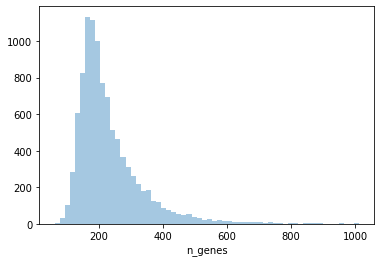

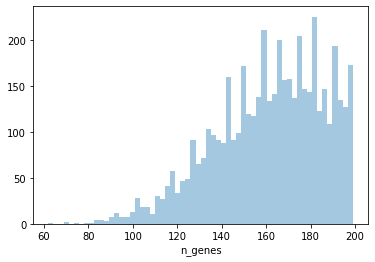

In [27]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 200], kde=False, bins=60)
plt.show()

In [28]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 80)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 9986


Trying to set attribute `.obs` of view, copying.


Number of cells after min genes filter: 9981


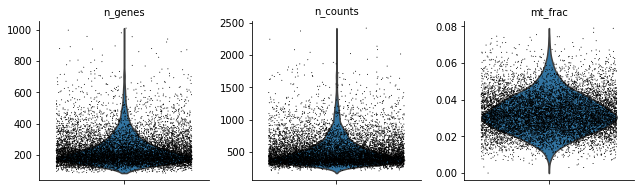

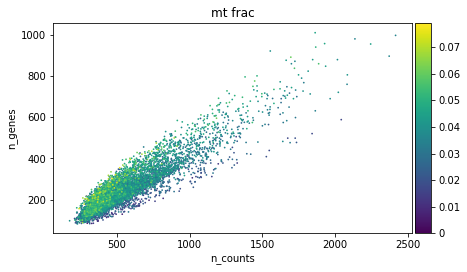

In [29]:
# visualise QC metrics after filtering
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [30]:
adata.obs['sample'] = 'N03'
adata.var_names_make_unique()
adatas.append(adata)

In [31]:
# merge all samples
adata_merge = adatas[0].concatenate(adatas[1:], batch_key='sample_ID')
adata_merge

AnnData object with n_obs × n_vars = 29920 × 14206
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'sample', 'sample_ID'

In [32]:
adata_merge.X = sparse.csr_matrix(adata_merge.X).astype(dtype='float32')
adata_merge.layers['counts'] = adata_merge.X
sc.pp.normalize_per_cell(adata_merge, counts_per_cell_after=1e4)
sc.pp.log1p(adata_merge)
adata_merge

AnnData object with n_obs × n_vars = 29920 × 14206
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'sample', 'sample_ID'
    uns: 'log1p'
    layers: 'counts'

In [33]:
adata_merge.write('../data/wu/wu_healthy.h5ad')

... storing 'sample' as categorical


----------------------
I used `../rscripts/singleR.R` to predict cell types. Going to see how they look.

In [3]:
adata = sc.read('../data/wu/wu_healthy.h5ad')
labs = pd.read_csv('../data/wu/wu_healthy_cell_labels.csv', sep = '\t')
adata.obs['celltype'] = labs['label']

/home/sennis/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../home/sennis/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/sennis/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../home/sennis/anaconda3/lib/python3.

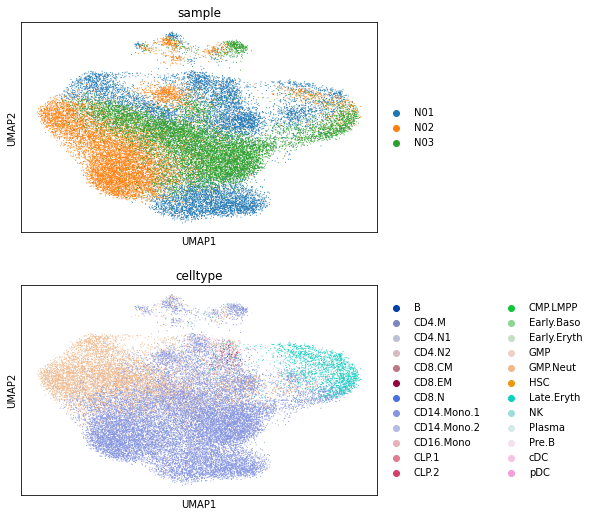

In [4]:
sc.pp.highly_variable_genes(adata, n_top_genes=4000)
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['sample', 'celltype'], ncols=1)

In [5]:
adata.obs['celltype'].value_counts()

CD14.Mono.1    18522
GMP.Neut        6797
GMP             1700
Late.Eryth      1692
CD14.Mono.2      490
Plasma           210
CLP.1            108
cDC               95
CLP.2             45
B                 44
NK                34
Pre.B             34
CD16.Mono         32
CMP.LMPP          22
CD8.CM            21
pDC               21
Early.Baso        20
Early.Eryth       14
CD8.EM             8
HSC                4
CD4.M              3
CD8.N              2
CD4.N2             1
CD4.N1             1
Name: celltype, dtype: int64

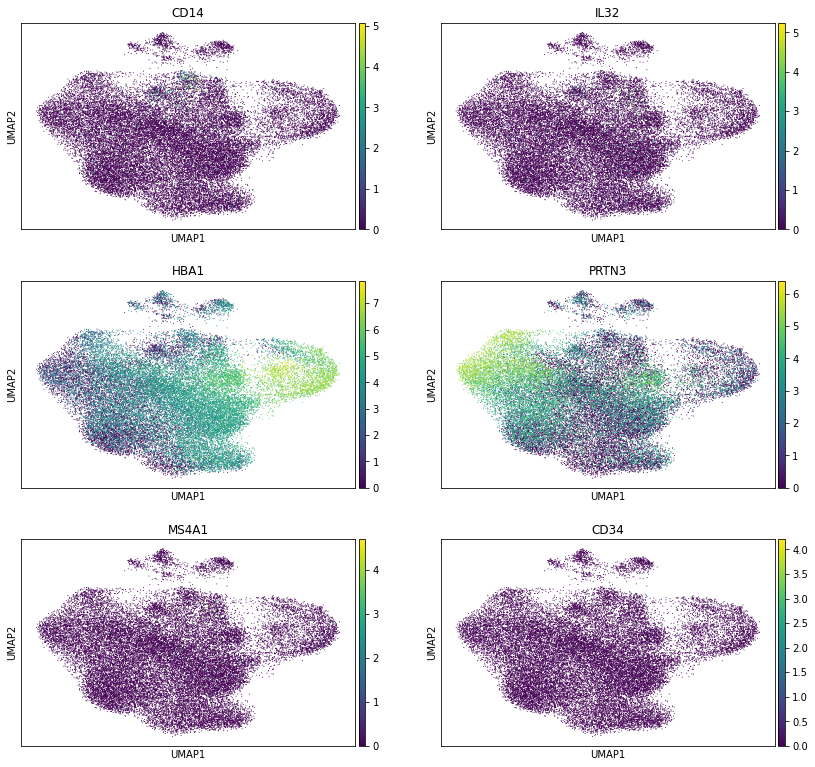

In [6]:
# make sure cells are expressing the genes you'd expect
sc.pl.umap(adata, color=['CD14', 'IL32', 'HBA1', 'PRTN3', 'MS4A1', 'CD34'], ncols=2)

Cells are not expressing genes that you would expect them to. Not sure what they are. Will take a look at differentially expressed genes.

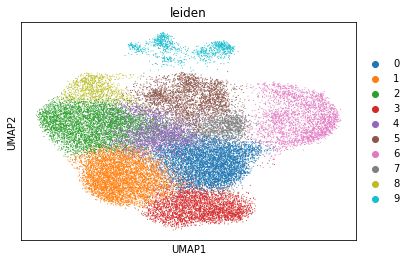

In [7]:
sc.tl.leiden(adata, resolution=0.8)
sc.pl.umap(adata, color='leiden')

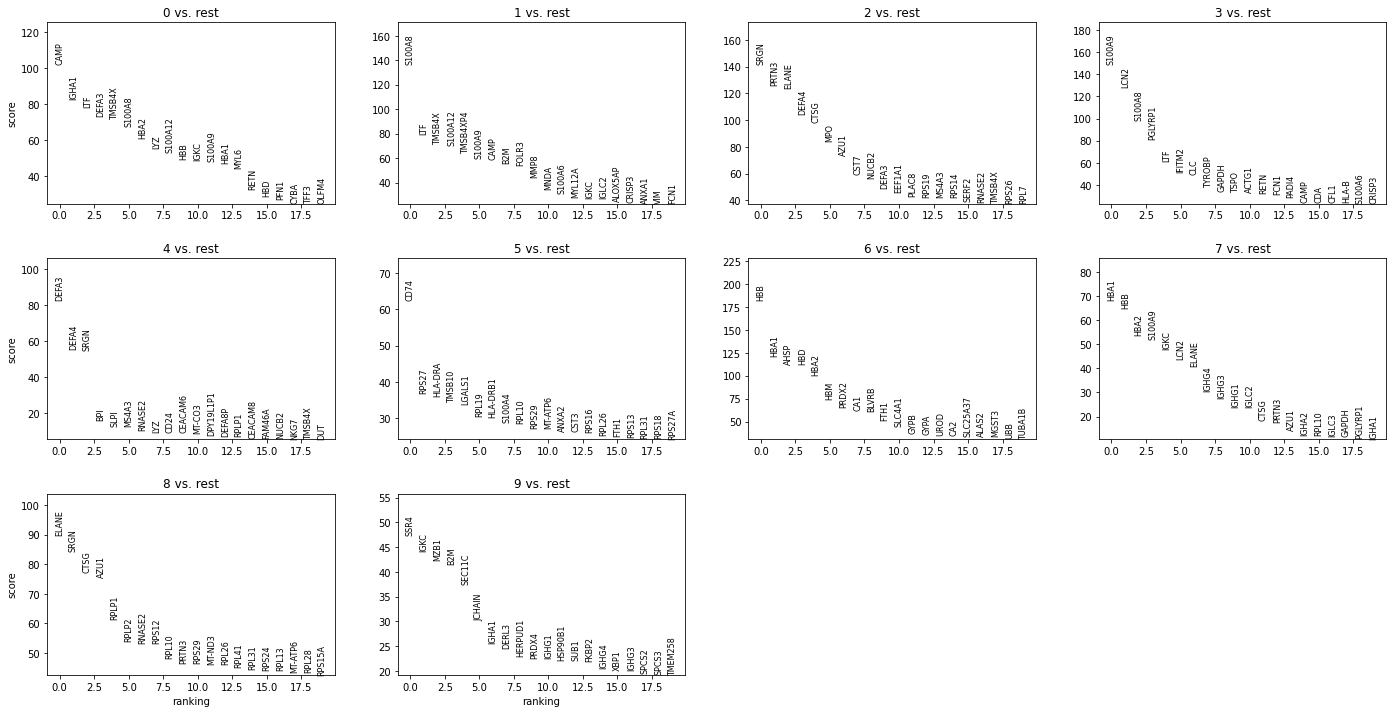

In [8]:
sc.tl.rank_genes_groups(adata, groupby='leiden')
sc.pl.rank_genes_groups(adata, sharey=False)

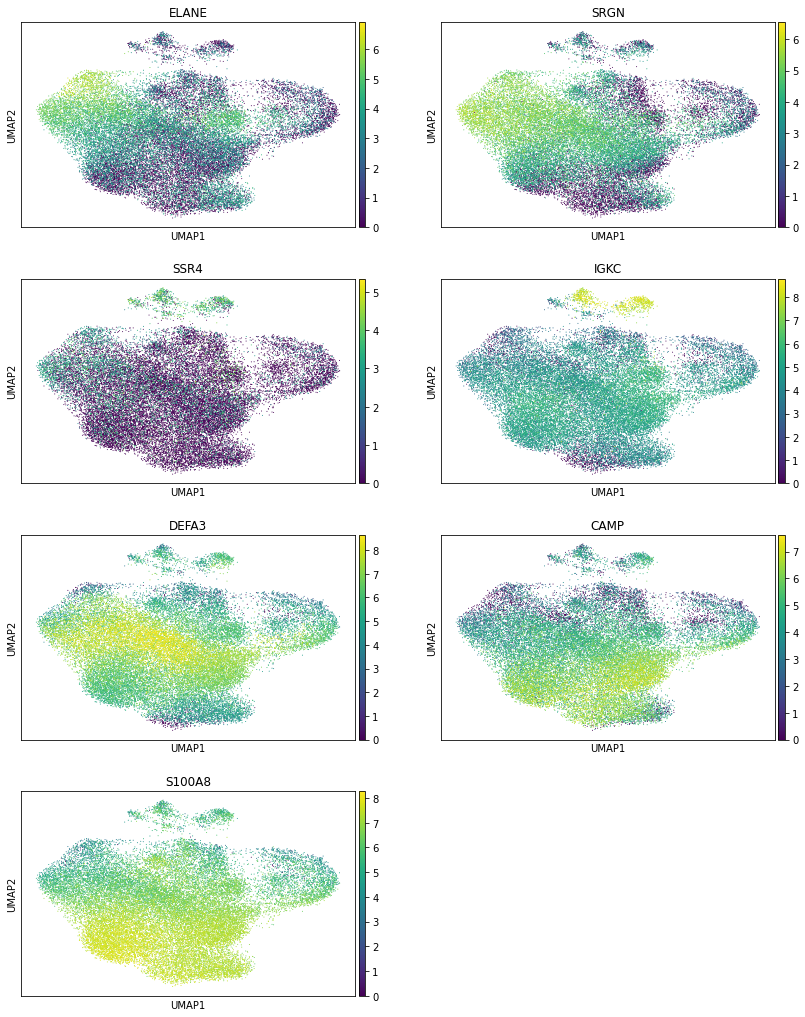

In [9]:
sc.pl.umap(adata, color=['ELANE', 'SRGN', 'SSR4', 'IGKC', 'DEFA3', 'CAMP', 'S100A8'], ncols=2)

Some clusters of cells do look similar to bone marrow cell types that you would expect to see such as monocytes, granulocytes, erythrocytes and B cells. However, these cells have very low number of counts per cell and dropouts are probably very prevalent in this dataset. Could probably benefit from imputation but for now I will leave this dataset out of the analysis.

In [10]:
# save file with cell type labels
adata.write('../data/wu/wu_healthy.h5ad')